In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
# Instead of importing everything, I imported only necessary things.
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

I have imported the necessary libraries. Now, I'm going to read dataset by using pd.read_csv() and printing the first 10 images.

In [2]:
data = pd.read_csv(r"C:\Users\dorae\A_Z Handwritten Data.csv").astype('float32')

#print(data.head(10))

I read the dataset. Now, I'm splitting data. 

In [3]:
X = data.drop('0',axis = 1)

'drop' function is from **pandas**. It drops specified labels or rows. 0th column contains labels so we splitted labels from data.

In [4]:
y = data['0']

y is containing labels.

Now, I'm going to split dataset for training and testing.

In [5]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

'train_test_split' function is from **scikitlearn**. It splits array randomly into 2 subsets. test_size is representing the proportion of test data to whole data. I used a common split percentage by specifying test_size = 0.2. It means that train data would be %80 and test data would be %20 of the data.

In [6]:
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

'reshape' function is from **numpy**. It reshapes arrays. Data is shaped into 28x28 pixels.

In [7]:
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


We can see that there are total 372450 data.

In [8]:
letter_list = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',
               16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

I associated each letter with an integer value. Turkish characters doesn't exist in the dataset. So we have total 26 letters.

In [9]:
y_int = np.int0(y)
count = np.zeros(26, dtype = 'int')

In [10]:
for i in y_int:
    count[i] += 1

I converted labels into integer values. After that I created a list named 'count' with 26 indexes and I assigned 0 to all list member. The for loop counted all letters so, 'count' countains number of each letter.

In [11]:
alphabets = []
for i in letter_list.values():
    alphabets.append(i)

Now, I created another list named 'alphabets' and it contains all letters. 

'subplots' is from **matplotlib**. Horizontal bar plot is created by using 'barh'. 

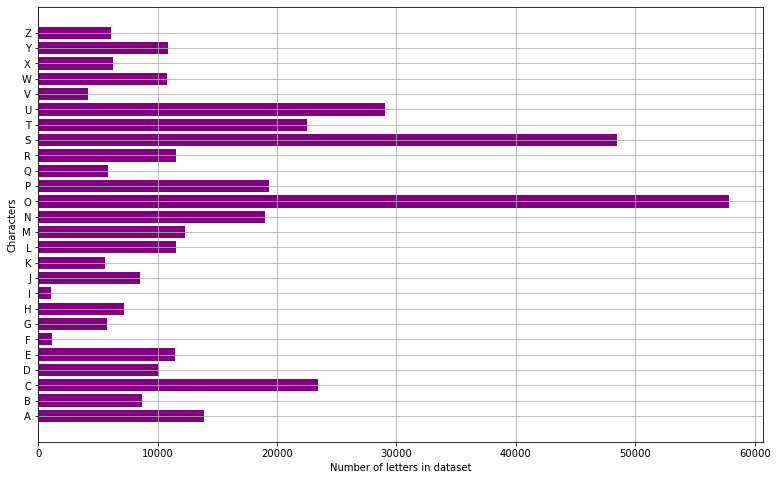

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (13,8)) #1,1 means we have 1 graph. 15,15 is ratio of graph.
ax.barh(alphabets, count, color = 'purple')
plt.xlabel("Number of letters in dataset")
plt.ylabel("Characters")
plt.grid() #lines in the graph
plt.show() 

In [13]:
shuffled = shuffle(train_x[:100])

train_x lists first 100 element is shuffled.

'threshold' is from **opencv**. It is used for seperating an image as a background and foreground. In here, I'm going to use it for displaying some images from the shuffled data.

Each pixel value in shuffled[i] will be compared to Threshold Value which is 30 in here. If the pixel value is under 30, it is going to be set to 0 and if the pixel value is above 30, then it is going to be set to 200.

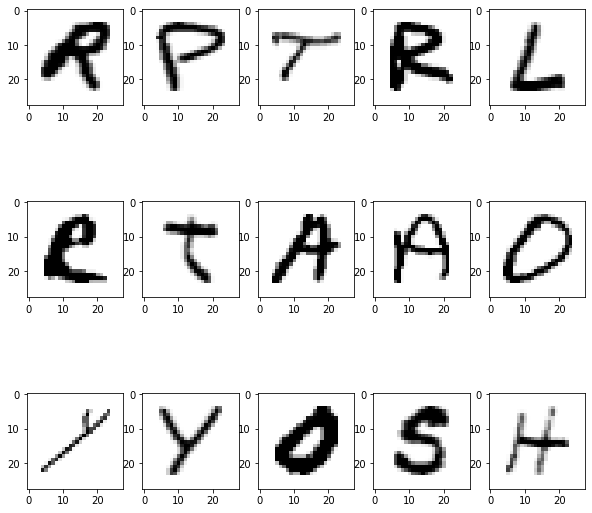

In [14]:
fig, ax = plt.subplots(3,5, figsize = (10,10))
axes = ax.flatten()

for i in range(15):
    retVal, thresholds = cv2.threshold(shuffled[i], 30, 200, cv2.THRESH_BINARY)
    
    # retVal is representing optimal threshold value but since I'm using simple thresholding, I won't need that value.
    # shuffled is the source as pixels of 1 data.
    # applying threshold_binary technique.
    
    img = np.reshape(shuffled[i], (28,28))
    
    # reshaping shuffled[i] as it is going to be 28 array which contains 28 pixels.
    
    axes[i].imshow(img, cmap = "Greys") 
    
    #imshow displays data as an image. cmap defines color, it can be changed into another color, I used gray tones.


In [15]:
train_X = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2], 1)

# train_x shape is 297960, 28, 28 for this dataset so we're using parameters of train_x.shape for reshaping it. 
# train_x.shape[0] = 297960, train_x.shape[1] = train_x.shape[2] = 28

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)


Why I reshaped the data?

In order to put data in the model. I wanted to be sure that TensorFlow/Keras is able to read the data correctly. Keras/TensorFlow will take the shape of data as (NumberOfImages, ImageWidth, ImageHeight, ColorDimension). So I simply added ColorDimension to shape of my data which is 1.

In [16]:
# See, if the shape of data is in the format that Keras wants:

print("New shape of train data: ", train_X.shape)
print("New shape of test data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)


In [17]:
train_y_bin = to_categorical(train_y, num_classes = 26, dtype = 'int')
print("New shape of train labels: ", train_y_bin.shape)

test_y_bin = to_categorical(test_y, num_classes = 26, dtype = 'int')
print("New shape of test labels: ", test_y_bin.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


'to_categorical' is from **tensorflow**. It converts a vector to a binary matrix. I converted train_y into a binary matrix because since I'm using a categorical data (letters: a,b,c,... values of letters represent different categories) , I wanted to implement 'One Hot Encoding'.

One Hot Encoding: <br>
$\;\;\;\;\;\;$ While using categorical data, some algorithms cannot operate labeled data. I have a dataset which contains letters. Each category has names like A, B, C,... and these are labels, categories are not numeric. The algorithm that I'm about to use requires numeric inputs and outputs. <br>
$\;\;\;\;\;\;$ One Hot Encoding provides a binary representation of each label. For example while representing A, instead of using A directly, we encode A like a binary number 1 0 0 0 0 0 .. 0 0. <br>
$\;\;\;\;\;\;$ For a better understanding, I can show a little sample on A B C:

| A | B | C |
| --- | --- | --- |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 0 | 0 | 1 |

$\;\;\;\;\;\;$ If A is represented, only A column is set as '1' and the other columns are filled with '0'. Same for the other labels. Since my dataset is alphabet letters, I have 26 columns in train_y_bin that represents letters. 

***Until here, I worked on data. Now, I'm going to build the model***

Building a CNN Model : Convolutional Neural Network <br>
*brief notes*<br>
• White pixels in the image are marked as -1 and black pixels are marked as 1. <br>
• CNN compares images piece by piece. <br>
• small images are taken of the big image. <br>
**-> First Layer : Convolutional Layer** <br>
$\;\;\;$ Moving the filter to every possible position on the image. Then multiply each big image pixel (-1 or 1) by the corresponding filtered small image's pixel. After than take average of the small image's pixel values and place the result into the middle of the filtered part.<br>
**-> Second Layer : ReLU Layer**<br>
$\;\;\;$ In this layer, remove all negative values from the filtered image and replace them with zeros.<br>
**-> Third Layer : Pooling Layer**<br>
$\;\;\;$ Pick a window size and a step size. After that walk on the window across filtered image. From each window, take the maximum value. By doing this, image becomes minimized/shrinked<br>
•Then apply these layers again.<br>
**-> Final Layer : Actual Classification**<br>
$\;\;\;$ At the end, convert the minimized images of a category into a single dimensional vector. In the vector, there will be some values which are higher than others. So, after training, it is known that which indexes containg higher values for one specific letter.<br>
**Comparing a Letter For Classification**<br>
Sum all the specified indexes' values on the input image which is wanted to be categorized. Sum all values of the decision vector. Divide these two values. The result is determined by this division. If division is high, then input image belongs to that category.

In [18]:
model = Sequential() # sequential model allows creating layers

In [19]:
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28,28,1)))

'Conv2d' is from **tensorflow**. <br>
filters are the number of output filters in the convolution. <br>
kernel_size specifies the height and width of the 2D convolution window. <br>
activation is activation function to use.

In [20]:
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

'MaxPool2D' is from **tensorflow** <br>
pool_size is window size. strides is step size.

In [21]:
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

Same steps with filters is 64. <br>
If padding = 'same' output is produced of the same size as the input. 

In [22]:
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(64, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(26, activation = "softmax"))

softmax function converts a vector of numbers into a vector of probabilities

In [25]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

categorical_crossentropy computes the crossentropy loss between the labels and predictions. It expects labels to be represented in one hot encoding. <br>
metrics acurracy calculates how often predictions equal labels.

In [26]:
history = model.fit(train_X, train_y_bin, epochs = 1,  validation_data = (test_X, test_y_bin))

9312/9312 [==============================] - 95s 10ms/step - loss: 0.1582 - accuracy: 0.9562 - val_loss: 0.0800 - val_accuracy: 0.9780


I saved my model as h5 file which is Hierarchical Data Format. Contains scientific data.

In [27]:
model.save(r'hwchar_model.h5')

In [28]:
# model.summary()

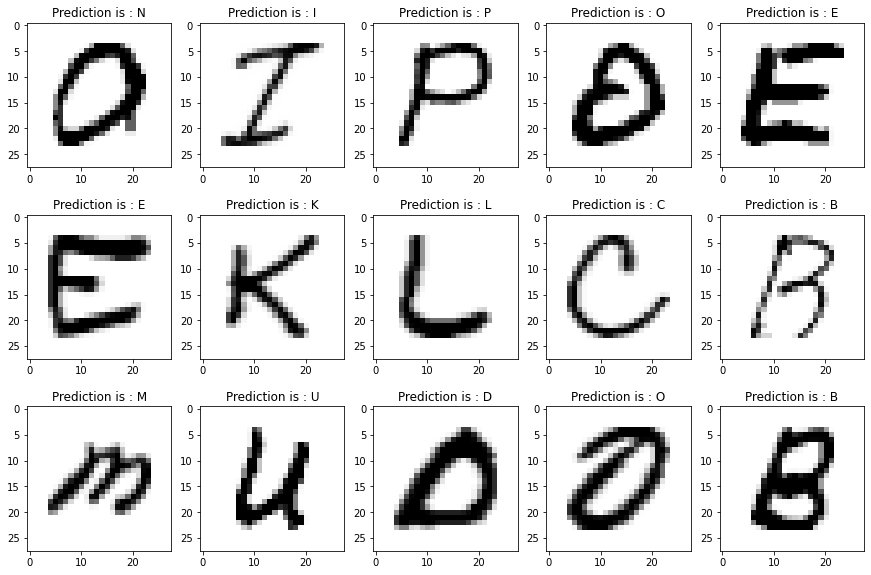

In [29]:
fig, axes = plt.subplots(3, 5, figsize = (15,10)) # ax is [0,0] [0,1] [0,2] 
                                                    #  [1,0] [1,1] [1,2]...
axes = axes.flatten()

# enumerating axes so I can iterate over each subplot.

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    axes[i].imshow(img, cmap = "Greys")
    
    predicted = letter_list[np.argmax(test_y_bin[i])] # argmax returns the index of maximum value. 
                                                      # maximum value is given to the most accurate prediction.
    axes[i].set_title("Prediction is : " + predicted)

These are the test datas and predictions are correct.

# GUI PROGRAM FOR DRAWING CHARACTERS AND RECOGNIZE IT (uncomment to try)

In [39]:
 #GUI that predicts the written letter

from tkinter import *
import tkinter as tk
from PIL import ImageGrab, Image

def predict_Letter(img):
    img_copy = np.array(img.copy())  #shaping and binarization to make it appropriate for model
    img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)        
    retVal, img_thresh = cv2.threshold(img_gray, 30, 255, cv2.THRESH_BINARY_INV)
    img_final = cv2.resize(img_thresh, (28,28))
    img_final = np.reshape(img_final, (1,28,28,1))
    
    fig, axes = plt.subplots(1,1, figsize=(8,8))  #prints the letters which are drawn to the screen
    bastir = np.reshape(img_final, (28,28))
    axes.imshow(bastir, cmap="Greys")
    axes.set_title("Drawn Character")
    
    img_pred = letter_list[np.argmax(model.predict(img_final))] #prediction
    percent = max(model.predict(img_final))
    return img_pred, percent

def clear_Canvas():
    canvas.delete("all")
    label1.configure(text = "Draw a Letter!")
    label1.grid(padx = 50)
    
def recognize():
    x0 = canvas.winfo_rootx() + 70
    y0 = canvas.winfo_rooty() + 30
    x1 = x0 + canvas.winfo_width() + 130
    y1 = y0 + canvas.winfo_height() + 130
    img = ImageGrab.grab((x0, y0, x1, y1))
    char, percent = predict_Letter(img)
    label1.configure(text = "Predicted is " + char + "\nwith the accuracy " + str(int(max(percent)*100))+"%")
    label1.grid(padx = 0)
        

def draw_Letter(event):
    r = 10
    canvas.create_oval(event.x - r, event.y - r, event.x + r, event.y + r, fill = 'black', outline = 'black')
    
    
def create_GUI():

    canvas.grid(row = 0, column = 0, padx = 50, pady = 50)
    label1.grid(row = 0, column = 1, padx = 50, pady = 50)
    button1.grid(row = 1, column = 1)
    button2.grid(row = 1, column = 0)
    canvas.bind("<B1-Motion>", draw_Letter)
    
    window.mainloop()


    
window = tk.Tk()
window.geometry("850x600+300+100")
window.title("Handwritten Character Recognition")
window.configure(bg = '#dfeff7')
window.x = 0
window.y = 0
canvas  = tk.Canvas(window, width = 400, height = 400, bg = "white", cursor = "circle")
label1  = tk.Label(window, text = "Draw a Letter!", font = ("Georgia", 24), bg = '#dfeff7' )
button1 = tk.Button(window, text = "Recognize", width = 10, height = 3, font = ("Georgia", 10), 
                    relief='groove', command = recognize, bg = '#32547d', fg = '#e1ebf7')
button2 = tk.Button(window, text = "Clear",  width = 10, height = 3, font = ("Georgia", 10), 
                    relief='groove', command = clear_Canvas, bg = '#32547d', fg = '#e1ebf7')


    
create_GUI()


# GUI PROGRAM FOR UPLOADING CHARACTER IMAGES AND RECOGNIZE IT (uncomment to try)

In [48]:
 #GUI that predicts the uploaded letter

from tkinter import *
import tkinter as tk
from PIL import ImageTk, ImageGrab, Image
from tkinter.filedialog import askopenfilename
import matplotlib.image as mpimg 

def predict_Letter(img):
    #shaping and binarization to make it appropriate for model
    img_new = cv2.GaussianBlur(img, (7,7), 0)   
    retVal, img_thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)
    img_final = cv2.resize(img_thresh, (28,28))
    img_final = np.reshape(img_final, (1,28,28,1))
    
    fig, axes = plt.subplots(1,1, figsize=(8,8))  #prints the letters which are drawn to the screen
    bastir = np.reshape(img_final, (28,28))
    axes.imshow(bastir, cmap="Greys")
    axes.set_title("Uploaded Character")
    
    img_pred = letter_list[np.argmax(model.predict(img_final))] #prediction
    percent = max(model.predict(img_final))
    return img_pred, percent


def clear_all():
    label1.pack_forget()
    label2.pack_forget()
    label3.pack_forget()
    
    button2.pack_forget()
    button1.place(x = 190, y = 400)
    label0.place(x = 20, y = 350)


def upload_Picture():
    
    filename = askopenfilename()       # gets a selected file's directory as a string from computer
    img = Image.open(filename)         # opens that file
    filename_new = list(filename)      # string to list
        
    label0.place_forget()
    button1.place_forget()
    
    for i in range(len(filename_new)):
        if filename_new[i] == '/' :
            filename_new[i] = "\\"     # changing slashes with backslashes to use it in imread function
            
    filename_final = ''.join(filename_new) # converting filename_new list to string
    
    img.thumbnail((350,350))           # resizing image by keeping the ratio of it
    img_tk = ImageTk.PhotoImage(img)   # tkinter image module
    label1.configure(image = img_tk)   # loading image in a label
    label1.image = img_tk
    label1.pack()                      # showing the uploaded image on the gui
    
    data = cv2.imread(filename_final, 0)  # turning the image into grayscale and representing it as an array


    if data is not None:
        data = np.array(data)    # converting data into a numpy array to process
        char, percent = predict_Letter(data)
        
        label2.configure(text = "Predicted is " + char + " with the accuracy " + str(int(max(percent)*100))+"%",
                          font = ("Georgia", 13), bg = "#fff5fc")
        label2.pack()               
        
        if max(percent) < 0.60 :
            label3.configure(text = "Color or shape is not clear enough. \nMaybe you should try another image.",
                              font = ("Georgia", 13), bg = "#fff5fc")
            label3.pack()
                   
    else:
        label2.configure(text = "This image is not compatible. Please try another image.", 
                          font = ("Georgia", 13),bg = "#fff5fc")
        label2.pack()


    button2.pack()

    
    
def create_GUI():
    button1.place(x = 180, y = 400)
    label0.place(x = 20, y = 350)
    
    window.mainloop()
    

window = tk.Tk()
window.geometry("500x500+500+200")
window.title("Handwritten Character Recognition")
window.configure(bg = "#fff5fc")
window.title("Handwritten Character Recognition")
button1 = tk.Button(window, text = "Open Image", width = 15, height = 3, font = ("Georgia", 10), 
                    relief='groove', command = upload_Picture, bg = '#52023a', fg = '#dbced7')

button2 = tk.Button(window, text = "Clear All", width = 15, height = 3, font = ("Georgia", 10), 
                    relief='groove', command = clear_all, bg = '#52023a', fg = '#dbced7')

label0 = tk.Label(text = "For high accuracy rate, please upload dark and thick images.", font = ("Georgia", 13),
                 bg = "#fff5fc")

label1 = tk.Label(window)
label2 = tk.Label(window)
label3 = tk.Label(window)


create_GUI()
